# ANOVA Analysis of NBA Players: Is bigger better?

For this project, I will be analysing the relationships between NBA players' height, weight and wingspan and their playing performance in some key statistical areas.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the data
In order to get the dataset, I had to get the data from 2 sources. 

## Anthoprometric Data

The first source was https://www.nba.com/stats/draft/combine-anthro/. This page contains data on all draft classes (Incoming players from college that will be selected by pro teams) by year. This gave me data for the player anthroprometric data. This data had to be manually pasted into an excel document as exporting / auto-scraping the data was proving difficult. I went back as far as 03/04 (this is the draft class that contained LeBron James, who I'm quite sure will be the earliest player drafted given the criteria I'll be using in this project). I did not include players drafted in the last 2 years for reasons I will explain later on.

The data had to be copied from the webpages and, in excel, 'Paste Special' had to be selected and 'Text' selected in the pop-up menu. The excel was then saved as a CSV and ready for cleaning.

In [2]:
# Custom headers are used to remove symbols that were causing issues
headers = ['Player', 'Position', 'Body Fat', 'Hand Length', 'Hand Width', 'Height', 'Height in Shoes', 'Standing Reach', 'Weight', 'Wingspan']

# Skips first row to skip headers in original doc
df = pd.read_csv('All_Draftees_02_19.csv', names = headers, skiprows = 1)
df[:10]

,Player,Position,Body Fat,Hand Length,Hand Width,Height,Height in Shoes,Standing Reach,Weight,Wingspan
0,Kris Dunn,PG,-%,-,-,6' 3'',6' 4.25'',8' 4'',0,6' 9.5''
1,Tyler Ulis,PG,5.20%,7.5,7.5,5' 8.75'',5' 10'',7' 4.5'',149.2,6' 2''
2,John Lucas III,PG,-%,-,-,5' 9.25'',5' 10.5'',7' 8'',154.4,6' 0''
3,Russ Smith,PG,3.50%,8.25,8.5,5' 11.5'',6' 0.75'',7' 11'',160,6' 3.5''
4,Daryl Dorsey,PG,-%,-,-,5' 11.25'',6' 0.5'',7' 10'',160.8,5' 11.5''
5,Aaron Brooks,PG,2.70%,-,-,5' 10'',5' 11.75'',7' 10'',161,6' 4''
6,T.J. Ford,PG,6.70%,-,-,5' 11'',NaN,7' 9.5'',162,5' 11.5''
7,Marcus Hatten,PG,4.00%,-,-,6' 0.75'',NaN,8' 2'',163,6' 6.25''
8,Eric Maynor,PG,5.40%,-,-,6' 2.25'',6' 3.25'',8' 1'',163.6,6' 2.5''
9,Marcus Paige,PG,4.30%,7.75,8.75,6' 0.5'',6' 1.75'',8' 1'',163.8,6' 6.25''


#### Notes about measurements

- Both hand length and hand size are not included in come years so will not be used
- There are 2 different heights: with shoes and without shoes. Height without shoes has more measurements and will be used as more measurements are present
- Somes players do not have measurements. These may have to be obtained by other means.

In [3]:
# Only include the data we will be analysing
nbadf = df[['Player', 'Position', 'Height', 'Weight', 'Wingspan']]
nbadf[:10]

,Player,Position,Height,Weight,Wingspan
0,Kris Dunn,PG,6' 3'',0,6' 9.5''
1,Tyler Ulis,PG,5' 8.75'',149.2,6' 2''
2,John Lucas III,PG,5' 9.25'',154.4,6' 0''
3,Russ Smith,PG,5' 11.5'',160,6' 3.5''
4,Daryl Dorsey,PG,5' 11.25'',160.8,5' 11.5''
5,Aaron Brooks,PG,5' 10'',161,6' 4''
6,T.J. Ford,PG,5' 11'',162,5' 11.5''
7,Marcus Hatten,PG,6' 0.75'',163,6' 6.25''
8,Eric Maynor,PG,6' 2.25'',163.6,6' 2.5''
9,Marcus Paige,PG,6' 0.5'',163.8,6' 6.25''


In [4]:
# Strip '' from right side of Heights and Wingspans
nbadf['Height'] = nbadf.loc[:,'Height'].str.strip('\'')
nbadf['Wingspan'] = nbadf.loc[:,'Wingspan'].str.strip('\'')
nbadf[:10]

<ipython-input-4-04cc7652ad3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbadf['Height'] = nbadf.loc[:,'Height'].str.strip('\'')
<ipython-input-4-04cc7652ad3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbadf['Wingspan'] = nbadf.loc[:,'Wingspan'].str.strip('\'')


,Player,Position,Height,Weight,Wingspan
0,Kris Dunn,PG,6' 3,0,6' 9.5
1,Tyler Ulis,PG,5' 8.75,149.2,6' 2
2,John Lucas III,PG,5' 9.25,154.4,6' 0
3,Russ Smith,PG,5' 11.5,160,6' 3.5
4,Daryl Dorsey,PG,5' 11.25,160.8,5' 11.5
5,Aaron Brooks,PG,5' 10,161,6' 4
6,T.J. Ford,PG,5' 11,162,5' 11.5
7,Marcus Hatten,PG,6' 0.75,163,6' 6.25
8,Eric Maynor,PG,6' 2.25,163.6,6' 2.5
9,Marcus Paige,PG,6' 0.5,163.8,6' 6.25


In [5]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
# Use string split to seperate feet and inches

nbadf[['Height Feet','Height Inches']] = nbadf.Height.str.split('\'', expand = True)
nbadf[['Wingspan Feet','Wingspan Inches']] = nbadf.Wingspan.str.split('\'', expand = True)
nbadf[:10]

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Player,Position,Height,Weight,Wingspan,Height Feet,Height Inches,Wingspan Feet,Wingspan Inches
0,Kris Dunn,PG,6' 3,0,6' 9.5,6,3,6,9.5
1,Tyler Ulis,PG,5' 8.75,149.2,6' 2,5,8.75,6,2
2,John Lucas III,PG,5' 9.25,154.4,6' 0,5,9.25,6,0
3,Russ Smith,PG,5' 11.5,160,6' 3.5,5,11.5,6,3.5
4,Daryl Dorsey,PG,5' 11.25,160.8,5' 11.5,5,11.25,5,11.5
5,Aaron Brooks,PG,5' 10,161,6' 4,5,10,6,4
6,T.J. Ford,PG,5' 11,162,5' 11.5,5,11,5,11.5
7,Marcus Hatten,PG,6' 0.75,163,6' 6.25,6,0.75,6,6.25
8,Eric Maynor,PG,6' 2.25,163.6,6' 2.5,6,2.25,6,2.5
9,Marcus Paige,PG,6' 0.5,163.8,6' 6.25,6,0.5,6,6.25


In [6]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# Use to numeric to convert column to ints / floats and calculate based on 1 foot = 40.48cm and 1 inch = 2.54cm
nbadf['Height'] = pd.to_numeric(nbadf['Height Feet']) * 30.48 + pd.to_numeric(nbadf['Height Inches']) * 2.54
nbadf['Wingspan'] = pd.to_numeric(nbadf['Wingspan Feet']) * 30.48 + pd.to_numeric(nbadf['Wingspan Inches']) * 2.54
nbadf[:10]

<ipython-input-6-3e27a90e205e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbadf['Height'] = pd.to_numeric(nbadf['Height Feet']) * 30.48 + pd.to_numeric(nbadf['Height Inches']) * 2.54
<ipython-input-6-3e27a90e205e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbadf['Wingspan'] = pd.to_numeric(nbadf['Wingspan Feet']) * 30.48 + pd.to_numeric(nbadf['Wingspan Inches']) * 2.54


,Player,Position,Height,Weight,Wingspan,Height Feet,Height Inches,Wingspan Feet,Wingspan Inches
0,Kris Dunn,PG,190.500,0,207.010,6,3,6,9.5
1,Tyler Ulis,PG,174.625,149.2,187.960,5,8.75,6,2
2,John Lucas III,PG,175.895,154.4,182.880,5,9.25,6,0
3,Russ Smith,PG,181.610,160,191.770,5,11.5,6,3.5
4,Daryl Dorsey,PG,180.975,160.8,181.610,5,11.25,5,11.5
5,Aaron Brooks,PG,177.800,161,193.040,5,10,6,4
6,T.J. Ford,PG,180.340,162,181.610,5,11,5,11.5
7,Marcus Hatten,PG,184.785,163,198.755,6,0.75,6,6.25
8,Eric Maynor,PG,188.595,163.6,189.230,6,2.25,6,2.5
9,Marcus Paige,PG,184.150,163.8,198.755,6,0.5,6,6.25


In [7]:
# Remove '-' characters from Weight column
nbadf.loc[:,'Weight'] = nbadf.loc[:,'Weight'].str.strip('-')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [8]:
# Convert weight to kg using 1 pound = 0.4536kg
nbadf['Weight'] = pd.to_numeric(nbadf['Weight'])*0.4536
nbadf[:10]

<ipython-input-8-44adb0b68c97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbadf['Weight'] = pd.to_numeric(nbadf['Weight'])*0.4536


,Player,Position,Height,Weight,Wingspan,Height Feet,Height Inches,Wingspan Feet,Wingspan Inches
0,Kris Dunn,PG,190.500,0.00000,207.010,6,3,6,9.5
1,Tyler Ulis,PG,174.625,67.67712,187.960,5,8.75,6,2
2,John Lucas III,PG,175.895,70.03584,182.880,5,9.25,6,0
3,Russ Smith,PG,181.610,72.57600,191.770,5,11.5,6,3.5
4,Daryl Dorsey,PG,180.975,72.93888,181.610,5,11.25,5,11.5
5,Aaron Brooks,PG,177.800,73.02960,193.040,5,10,6,4
6,T.J. Ford,PG,180.340,73.48320,181.610,5,11,5,11.5
7,Marcus Hatten,PG,184.785,73.93680,198.755,6,0.75,6,6.25
8,Eric Maynor,PG,188.595,74.20896,189.230,6,2.25,6,2.5
9,Marcus Paige,PG,184.150,74.29968,198.755,6,0.5,6,6.25


In [9]:
nbadf = nbadf[['Player', 'Position', 'Height', 'Weight', 'Wingspan']]
nbadf[:10]

,Player,Position,Height,Weight,Wingspan
0,Kris Dunn,PG,190.500,0.00000,207.010
1,Tyler Ulis,PG,174.625,67.67712,187.960
2,John Lucas III,PG,175.895,70.03584,182.880
3,Russ Smith,PG,181.610,72.57600,191.770
4,Daryl Dorsey,PG,180.975,72.93888,181.610
5,Aaron Brooks,PG,177.800,73.02960,193.040
6,T.J. Ford,PG,180.340,73.48320,181.610
7,Marcus Hatten,PG,184.785,73.93680,198.755
8,Eric Maynor,PG,188.595,74.20896,189.230
9,Marcus Paige,PG,184.150,74.29968,198.755


In [10]:
# Remove NaNs and 0 values
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

# Only first row has a 0 value so that row will be removed
nbadf = nbadf.loc[1:,:]

# Count rows before drop
print(nbadf.count)

# inplace = True to drop from original df
nbadf.dropna(inplace=True)

# Count rows after drop
print(nbadf.count)

<bound method DataFrame.count of                Player Position   Height    Weight  Wingspan
1          Tyler Ulis       PG  174.625  67.67712    187.96
2      John Lucas III       PG  175.895  70.03584    182.88
3          Russ Smith       PG  181.610  72.57600    191.77
4        Daryl Dorsey       PG  180.975  72.93888    181.61
5        Aaron Brooks       PG  177.800  73.02960    193.04
...               ...      ...      ...       ...       ...
1120  De'Andre Hunter      NaN      NaN       NaN       NaN
1121        Ja Morant       PG      NaN       NaN       NaN
1122      Chuma Okeke      NaN      NaN       NaN       NaN
1123   Killian Tillie      NaN      NaN       NaN       NaN
1124  Zion Williamson       PF      NaN       NaN       NaN

[1124 rows x 5 columns]>
<bound method DataFrame.count of                Player Position   Height     Weight  Wingspan
1          Tyler Ulis       PG  174.625   67.67712   187.960
2      John Lucas III       PG  175.895   70.03584   182.880
3    

In [11]:
nbadf[:20]

,Player,Position,Height,Weight,Wingspan
1,Tyler Ulis,PG,174.625,67.67712,187.960
2,John Lucas III,PG,175.895,70.03584,182.880
3,Russ Smith,PG,181.610,72.57600,191.770
4,Daryl Dorsey,PG,180.975,72.93888,181.610
5,Aaron Brooks,PG,177.800,73.02960,193.040
6,T.J. Ford,PG,180.340,73.48320,181.610
7,Marcus Hatten,PG,184.785,73.93680,198.755
8,Eric Maynor,PG,188.595,74.20896,189.230
9,Marcus Paige,PG,184.150,74.29968,198.755
10,Dennis Schroder,PG,185.420,74.75328,202.565


## Player Performance Data

The source of the player performance data in this analysis was [BasketballReference.com](https://www.basketball-reference.com/), a great site for NBA stats. The data used will be performance data from the 2020/2021 NBA season which was the last full season played. Performance data was recorded **per 36 minutes**, which account for difference in playing time among players as rolling subs are used and a player will rarely play a full 48 minute game. Often, normalising NBA stats to 36 minutes creates some outliers at the lower end of minutes played e.g. a player who plays for 1 minute and scores 3 points will have a point-per-36 minutes of 108 points, which would break the record for points scored in a game with 12 minutes to spare. To prevent this, the top 200 players in total minutes played were used for this analysis, which is roughly the top 5 or 6 players in minutes played per team i.e. the starters.

To get the data into a dataframe, the data was exported into excel format directly from the site, sorted by minuted played. Then players outside the top 200 were removed and the 'rank' column that ranked players based on minutes played was also removed. The excel was then saved as a csv.

In [16]:
# Skips first row to skip headers in original doc
df = pd.read_csv('Player_Performance_20_21.csv')
df[:10]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Julius Randle,PF,26,NYK,71,71,2667,8.1,17.8,0.456,...,0.811,1.1,8.6,9.8,5.8,0.9,0.2,3.3,3.0,23.1
1,RJ Barrett,SG,20,NYK,72,72,2511,6.7,15.2,0.441,...,0.746,1.0,5.0,5.9,3.1,0.8,0.3,2.0,2.7,18.1
2,Nikola Jokić,C,25,DEN,72,72,2488,10.6,18.7,0.566,...,0.868,3.0,8.3,11.3,8.7,1.4,0.7,3.2,2.8,27.5
3,Buddy Hield,SG,28,SAC,71,71,2433,6.0,14.7,0.406,...,0.846,0.4,4.5,4.9,3.8,0.9,0.4,1.9,2.6,17.4
4,Damian Lillard,PG,30,POR,67,67,2398,9.0,20.0,0.451,...,0.928,0.5,3.8,4.2,7.6,0.9,0.3,3.0,1.5,28.9
5,Terry Rozier,SG,26,CHO,69,69,2383,7.7,17.1,0.450,...,0.817,0.7,3.9,4.6,4.4,1.3,0.4,1.9,1.8,21.3
6,Russell Westbrook,PG,32,WAS,65,65,2369,8.3,18.8,0.439,...,0.656,1.7,9.7,11.4,11.6,1.4,0.3,4.7,2.9,22.0
7,Andrew Wiggins,PF,25,GSW,71,71,2364,7.7,16.1,0.477,...,0.714,1.2,4.0,5.3,2.5,1.0,1.1,1.9,2.4,20.1
8,Mikal Bridges,SF,24,PHO,72,72,2348,5.6,10.3,0.543,...,0.840,1.2,3.6,4.7,2.3,1.2,1.0,0.9,1.8,14.9
9,Nikola Vučević,C,30,TOT,70,70,2348,10.2,21.4,0.477,...,0.840,2.2,10.3,12.5,4.1,1.0,0.7,1.9,2.1,25.1


In [13]:
# Assign variables to columns for visualisation
position = nbadf['Position']
height = nbadf['Height']
weight = nbadf['Weight']
wingspan = nbadf['Wingspan']

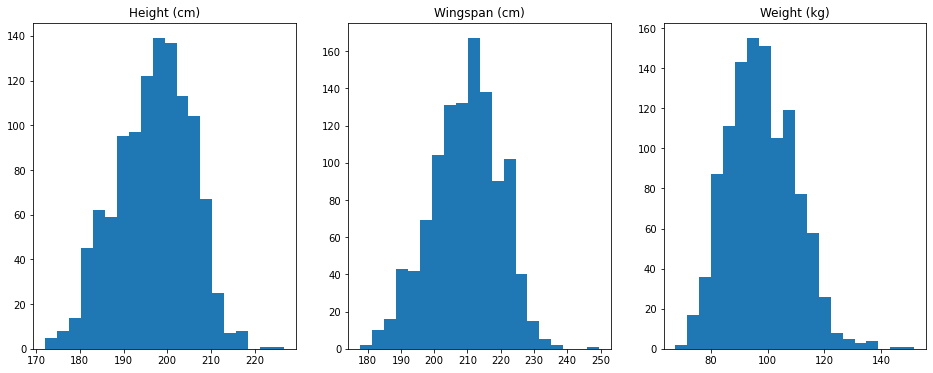

In [14]:
# Histograms to check for normal distribution
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize = (16,6))

ax1.hist(height, bins=20)
ax1.set_title('Height (cm)')

ax2.hist(wingspan, bins=20)
ax2.set_title('Wingspan (cm)')

ax3.hist(weight, bins=20)
ax3.set_title('Weight (kg)');


